In [95]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

In [96]:
data = pd.read_csv('DOR.csv')

# Selecting relevant features for clustering
selected_features = [
    'State_UT', 'year', 'Primary_Boys', 'Primary_Girls', 'Primary_Total',
    'Upper Primary_Boys', 'Upper Primary_Girls', 'Upper Primary_Total',
    'Secondary _Boys', 'Secondary _Girls', 'Secondary _Total',
    'HrSecondary_Boys', 'HrSecondary_Girls', 'HrSecondary_Total'
]
data = data[selected_features]
data = data.replace("NR", 0)

In [97]:
data

,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
0,A & N Islands,2012-13,0.83,0.51,0.68,0.75,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14
1,A & N Islands,2013-14,1.35,1.06,1.21,0,1.54,0.51,8.36,5.98,7.2,18.94,12.2,15.87
2,A & N Islands,2014-15,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93
3,Andhra Pradesh,2012-13,3.3,3.05,3.18,3.21,3.51,3.36,12.21,13.25,12.72,2.66,0,0.35
4,Andhra Pradesh,2013-14,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.65,10.85,11.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,West Bengal,2013-14,3.44,2.37,2.91,5.63,3.1,4.31,16.73,19.77,18.34,8.03,7.76,7.9
106,West Bengal,2014-15,2.13,0.79,1.47,5.84,2.88,4.3,16.33,19.06,17.8,8.18,8.04,8.11
107,All India,2012-13,4.68,4.66,4.67,2.3,4.01,3.13,14.54,14.54,14.54,0,0,0
108,All India,2013-14,4.53,4.14,4.34,3.09,4.49,3.77,17.93,17.79,17.86,1.48,1.61,1.54


In [98]:
# Drop rows with NULL values (NaNs)
data.dropna(inplace=True)

# Extract the 'year' column, convert it to a numerical format
data['year'] = data['year'].str.extract(r'(\d{4})').astype(int)

In [99]:
data

,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
0,A & N Islands,2012,0.83,0.51,0.68,0.75,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14
1,A & N Islands,2013,1.35,1.06,1.21,0,1.54,0.51,8.36,5.98,7.2,18.94,12.2,15.87
2,A & N Islands,2014,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93
3,Andhra Pradesh,2012,3.3,3.05,3.18,3.21,3.51,3.36,12.21,13.25,12.72,2.66,0,0.35
4,Andhra Pradesh,2013,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.65,10.85,11.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,West Bengal,2013,3.44,2.37,2.91,5.63,3.1,4.31,16.73,19.77,18.34,8.03,7.76,7.9
106,West Bengal,2014,2.13,0.79,1.47,5.84,2.88,4.3,16.33,19.06,17.8,8.18,8.04,8.11
107,All India,2012,4.68,4.66,4.67,2.3,4.01,3.13,14.54,14.54,14.54,0,0,0
108,All India,2013,4.53,4.14,4.34,3.09,4.49,3.77,17.93,17.79,17.86,1.48,1.61,1.54


In [100]:
# Standardize the numerical features for clustering
scaler = StandardScaler()
numerical_features = data.drop(columns=['State_UT'])

In [103]:
scaled_features = scaler.fit_transform(numerical_features)

In [104]:
scaled_features

array([[-1.23877448, -0.74428129, -0.77233586, ...,  1.45058175,
         0.9499399 ,  1.28361561],
       [-0.01116013, -0.63253555, -0.65099716, ...,  1.62423912,
         1.32656217,  1.55503201],
       [ 1.21645422, -0.82164372, -0.76351123, ...,  1.91050245,
         1.32839935,  1.7213334 ],
       ...,
       [-1.23877448,  0.08306693,  0.14321978, ..., -0.94534733,
        -0.91479962, -0.93478206],
       [-0.01116013,  0.05083259,  0.02849955, ..., -0.74455599,
        -0.61901335, -0.69317439],
       [ 1.21645422,  0.01430033, -0.02886056, ..., -0.91142987,
        -0.91479962, -0.93478206]])

In [109]:
# hierarchical clustering
agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='ward')  # Adjust n_clusters as needed
data['Cluster_Label'] = agg_clustering.fit_predict(scaled_features)

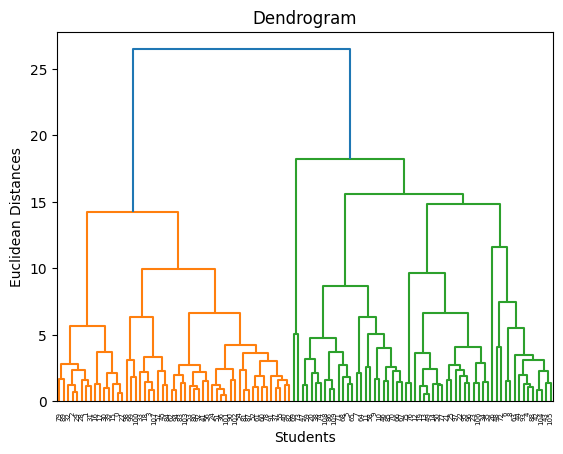

In [110]:
# Dendrogram
dendrogram = sch.dendrogram(sch.linkage(scaled_features, method='ward'))

# Visualize the dendrogram
plt.title('Dendrogram')
plt.xlabel('Students')
plt.ylabel('Euclidean Distances')
plt.show()

In [111]:
result_data = data[['State_UT', 'year', 'Cluster_Label']]
print(result_data)

           State_UT  year  Cluster_Label
0     A & N Islands  2012              0
1     A & N Islands  2013              0
2     A & N Islands  2014              0
3    Andhra Pradesh  2012              0
4    Andhra Pradesh  2013              1
..              ...   ...            ...
105     West Bengal  2013              1
106     West Bengal  2014              4
107       All India  2012              0
108       All India  2013              3
109       All India  2014              3

[110 rows x 3 columns]
